In [3]:
"""
@Author: Mohammad Fatha
@Date: 2021-11-24
@Last Modified by: Mohammad Fatha
@Title : To create a dataframe from cpu log data and perform sql operations on it.
"""
import findspark

In [4]:
findspark.init('/home/fatha/Downloads/spark-3.1.2-bin-hadoop3.2')

In [5]:
from pyspark.sql import *
spark = SparkSession.builder.getOrCreate()
from pyspark.sql.functions import *

2021-11-24 15:56:42,279 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
2021-11-24 15:56:49,844 WARN util.Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
2021-11-24 15:56:49,848 WARN util.Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.
2021-11-24 15:56:49,848 WARN util.Utils: Service 'SparkUI' could not bind on port 4042. Attempting port 4043.


In [6]:
df= spark.read.option("inferSchema", "true").csv("hdfs://localhost:9000/Spark/LogData/*.csv", header=True)

In [6]:
df.show()

2021-11-24 14:39:13,179 WARN util.package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------------------+---------+----------------+-------------+-----------+----------------+----------------------------------------+---------------------------------+-------------------------------+-----------------------+-----------------------+------------------------+-------------------+------------------+------------------+--------------------+----------------------+---------------------+--------------------+--------------------+----------------------+-----------------+----------------+----------------+---------------+----------------+---------------+----------------+----------------------------+--------------------------+----------------------------+--------------------+------------------------+----------------------+-------------------------+--------------------------------------+------------------------------------+---------------------------------------------------+---------------------------------------------------+--------------+--------------------+--------+------+----------

In [7]:
df1=df.select("user_name","DateTime","keyboard","mouse")
df1.show()

+--------------------+-------------------+--------+------+
|           user_name|           DateTime|keyboard| mouse|
+--------------------+-------------------+--------+------+
|  iamnzm@outlook.com|2019-09-19 08:40:02|     1.0|  32.0|
|  iamnzm@outlook.com|2019-09-19 08:45:02|     0.0|   0.0|
|  iamnzm@outlook.com|2019-09-19 08:50:01|     0.0|   0.0|
|  iamnzm@outlook.com|2019-09-19 08:55:01|    11.0| 900.0|
|  iamnzm@outlook.com|2019-09-19 09:00:01|     2.0|  25.0|
|  iamnzm@outlook.com|2019-09-19 09:05:01|    37.0| 336.0|
|deepshukla292@gma...|2019-09-19 09:05:01|     0.0|  55.0|
|  iamnzm@outlook.com|2019-09-19 09:10:01|     0.0| 136.0|
|deepshukla292@gma...|2019-09-19 09:10:01|     6.0|1112.0|
|  iamnzm@outlook.com|2019-09-19 09:15:02|     0.0|  84.0|
|deepshukla292@gma...|2019-09-19 09:15:02|     0.0| 357.0|
|markfernandes66@g...|2019-09-19 09:15:01|    20.0| 670.0|
|markfernandes66@g...|2019-09-19 09:10:01|    17.0|   0.0|
|markfernandes66@g...|2019-09-19 09:20:01|    29.0|1895.

In [8]:
df2=df1.groupBy("user_name").count()
df2.show()

+--------------------+-----+
|           user_name|count|
+--------------------+-----+
|salinabodale73@gm...|  478|
|sharlawar77@gmail...|  502|
|rahilstar11@gmail...|  479|
|deepshukla292@gma...|  487|
|  iamnzm@outlook.com|  540|
|markfernandes66@g...|  508|
|damodharn21@gmail...|  253|
|bhagyashrichalke2...|  403|
+--------------------+-----+



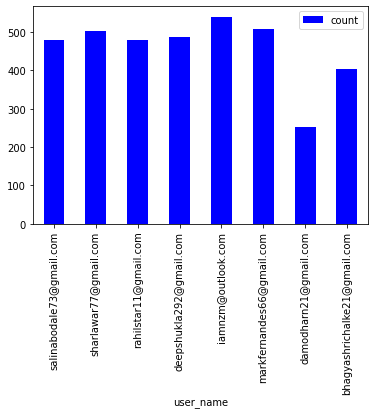

In [11]:
import matplotlib.pyplot as plt

try:
    pdf=df2.toPandas()
    pdf.plot.bar(x='user_name', y='count',color = 'b')
    plt.show()
except Exception as e:
    print(e)

In [9]:
df.createOrReplaceTempView("working_counts")

2021-11-24 15:59:18,549 WARN util.package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


In [10]:
df3=spark.sql("SELECT user_name FROM working_counts WHERE keyboard!=0 or mouse!=0").groupBy("user_name").count()
df3.show()

+--------------------+-----+
|           user_name|count|
+--------------------+-----+
|salinabodale73@gm...|  370|
|sharlawar77@gmail...|  397|
|rahilstar11@gmail...|  348|
|deepshukla292@gma...|  405|
|  iamnzm@outlook.com|  407|
|markfernandes66@g...|  389|
|damodharn21@gmail...|  191|
|bhagyashrichalke2...|  287|
+--------------------+-----+



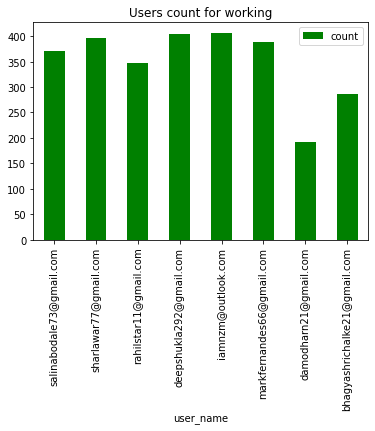

In [14]:
import matplotlib.pyplot as plt

try:
    pdf1=df3.toPandas()
    pdf1.plot.bar(x='user_name', y='count',color = 'g')
    plt.title("Users count for working")
    plt.show()
except Exception as e:
    print(e)

In [11]:
df3.createOrReplaceTempView("hour_view")

In [13]:
df4=spark.sql("SELECT user_name,count,(((((count)*5)*60)/6)) as avg_sec FROM hour_view")

In [14]:
df4.show(truncate=False)


+----------------------------+-----+-------+
|user_name                   |count|avg_sec|
+----------------------------+-----+-------+
|salinabodale73@gmail.com    |370  |18500.0|
|sharlawar77@gmail.com       |397  |19850.0|
|rahilstar11@gmail.com       |348  |17400.0|
|deepshukla292@gmail.com     |405  |20250.0|
|iamnzm@outlook.com          |407  |20350.0|
|markfernandes66@gmail.com   |389  |19450.0|
|damodharn21@gmail.com       |191  |9550.0 |
|bhagyashrichalke21@gmail.com|287  |14350.0|
+----------------------------+-----+-------+



In [15]:
from pyspark.sql.functions import *

highest_avg_hour = df4.withColumn("average_hours", concat(
            floor(col("avg_sec") % 86400 / 3600), lit(":"),
            floor((col("avg_sec") % 86400) % 3600 / 60), lit(" "),
           
        )).drop("avg_sec")

In [16]:
highest_avg_hour.show()

+--------------------+-----+-------------+
|           user_name|count|average_hours|
+--------------------+-----+-------------+
|salinabodale73@gm...|  370|         5:8 |
|sharlawar77@gmail...|  397|        5:30 |
|rahilstar11@gmail...|  348|        4:50 |
|deepshukla292@gma...|  405|        5:37 |
|  iamnzm@outlook.com|  407|        5:39 |
|markfernandes66@g...|  389|        5:24 |
|damodharn21@gmail...|  191|        2:39 |
|bhagyashrichalke2...|  287|        3:59 |
+--------------------+-----+-------------+



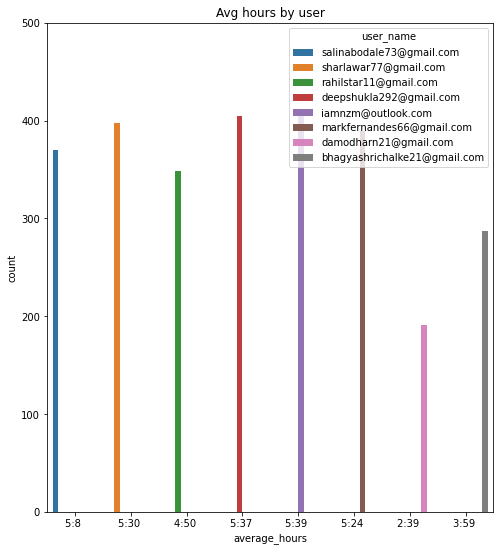

In [17]:
import seaborn as sns
from matplotlib import pyplot as plt

pdf3 = highest_avg_hour.toPandas()
plt.figure(figsize = (8,9))
sns.barplot(x = 'average_hours',y='count',data = pdf3,hue='user_name')
plt.title("Avg hours by user")
plt.ylim(0,500)
plt.show()

In [18]:
highest_avg_hour.createOrReplaceTempView("working_hour")

In [19]:
spark.sql("SELECT user_name as `user with highest avg hour`,average_hours  FROM working_hour WHERE average_hours = (SELECT MAX(average_hours) FROM working_hour)").show()


+--------------------------+-------------+
|user with highest avg hour|average_hours|
+--------------------------+-------------+
|      salinabodale73@gm...|         5:8 |
+--------------------------+-------------+



In [20]:
spark.sql("SELECT user_name as `user with lowest avg hour`,average_hours FROM working_hour WHERE average_hours = (SELECT MIN(average_hours) FROM working_hour)").show()


+-------------------------+-------------+
|user with lowest avg hour|average_hours|
+-------------------------+-------------+
|     damodharn21@gmail...|        2:39 |
+-------------------------+-------------+



In [21]:
df5=spark.sql("SELECT user_name FROM working_counts WHERE keyboard=0 and mouse=0").groupBy("user_name").count()
df5.show()

+--------------------+-----+
|           user_name|count|
+--------------------+-----+
|salinabodale73@gm...|  108|
|sharlawar77@gmail...|  105|
|rahilstar11@gmail...|  131|
|deepshukla292@gma...|   82|
|  iamnzm@outlook.com|  133|
|markfernandes66@g...|  119|
|damodharn21@gmail...|   62|
|bhagyashrichalke2...|  116|
+--------------------+-----+



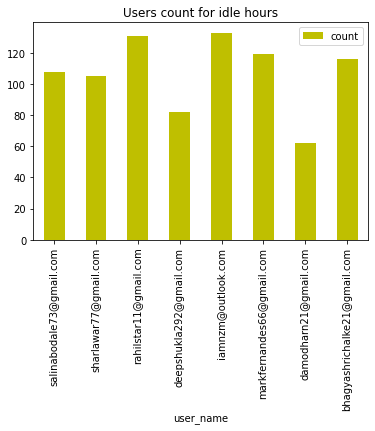

In [22]:
import matplotlib.pyplot as plt

try:
    pdf4=df5.toPandas()
    pdf4.plot.bar(x='user_name', y='count',color = 'y')
    plt.title("Users count for idle hours")
    plt.show()
except Exception as e:
    print(e)

In [23]:
df5.createOrReplaceTempView("idleHrs_by_user")


In [24]:
idle_sec=spark.sql("SELECT user_name,count,(((((count)*5)*60)/6)) as avg_idle_seconds FROM idleHrs_by_user")
idle_sec.show()

+--------------------+-----+----------------+
|           user_name|count|avg_idle_seconds|
+--------------------+-----+----------------+
|salinabodale73@gm...|  108|          5400.0|
|sharlawar77@gmail...|  105|          5250.0|
|rahilstar11@gmail...|  131|          6550.0|
|deepshukla292@gma...|   82|          4100.0|
|  iamnzm@outlook.com|  133|          6650.0|
|markfernandes66@g...|  119|          5950.0|
|damodharn21@gmail...|   62|          3100.0|
|bhagyashrichalke2...|  116|          5800.0|
+--------------------+-----+----------------+



In [25]:
from pyspark.sql.functions import *

idle_hours = idle_sec.withColumn("Avg_idle_hours", concat(
            floor(col("avg_idle_seconds") % 86400 / 3600), lit(":"),
            floor((col("avg_idle_seconds") % 86400) % 3600 / 60), lit(""),
           
        )).drop("avg_idle_seconds")

In [26]:
idle_hours.show()

+--------------------+-----+--------------+
|           user_name|count|Avg_idle_hours|
+--------------------+-----+--------------+
|salinabodale73@gm...|  108|          1:30|
|sharlawar77@gmail...|  105|          1:27|
|rahilstar11@gmail...|  131|          1:49|
|deepshukla292@gma...|   82|           1:8|
|  iamnzm@outlook.com|  133|          1:50|
|markfernandes66@g...|  119|          1:39|
|damodharn21@gmail...|   62|          0:51|
|bhagyashrichalke2...|  116|          1:36|
+--------------------+-----+--------------+



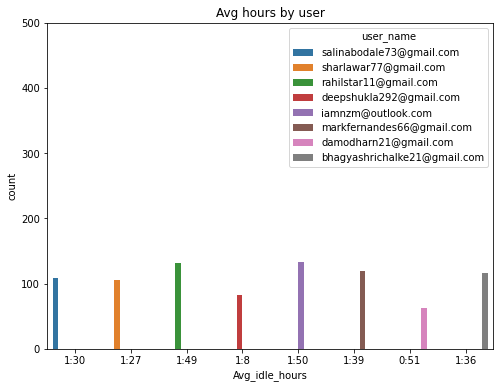

In [27]:
import seaborn as sns
from matplotlib import pyplot as plt

pdf5 = idle_hours.toPandas()
plt.figure(figsize = (8,6))
sns.barplot(x = 'Avg_idle_hours',y='count',data = pdf5,hue='user_name')
plt.title("Avg hours by user")
plt.ylim(0,500)
plt.show()

In [28]:
idle_hours.createOrReplaceTempView("idle_hrs_view")

In [29]:
spark.sql("SELECT user_name as `user with highest idle hour`,Avg_idle_hours  FROM idle_hrs_view WHERE Avg_idle_hours = (SELECT MAX(Avg_idle_hours) FROM idle_hrs_view)").show()


+---------------------------+--------------+
|user with highest idle hour|Avg_idle_hours|
+---------------------------+--------------+
|       deepshukla292@gma...|           1:8|
+---------------------------+--------------+



In [30]:
spark.sql("SELECT user_name as `user with lowest idle hour`,Avg_idle_hours  FROM idle_hrs_view WHERE Avg_idle_hours = (SELECT MIN(Avg_idle_hours) FROM idle_hrs_view)").show()


+--------------------------+--------------+
|user with lowest idle hour|Avg_idle_hours|
+--------------------------+--------------+
|      damodharn21@gmail...|          0:51|
+--------------------------+--------------+

